In [2]:
# 获取股票数据
import yfinance as yf
tickers = ['AAPL', 'BABA', 'BIDU', 'GOOGL', 'FB', 'AMZN']
data = yf.download(tickers = tickers, start = '2020-01-01', end = '2020-12-31')
data


[*********************100%***********************]  6 of 6 completed


Adj Close                                                   \
                  AAPL         AMZN        BABA        BIDU          FB   
Date                                                                      
2019-12-31   72.552094  1847.839966  212.100006  126.400002  205.250000   
2020-01-02   74.207466  1898.010010  219.770004  138.220001  209.779999   
2020-01-03   73.486023  1874.969971  217.000000  133.800003  208.669998   
2020-01-06   74.071579  1902.880005  216.639999  135.940002  212.600006   
2020-01-07   73.723213  1906.859985  217.630005  136.699997  213.059998   
...                ...          ...         ...         ...         ...   
2020-12-23  130.542862  3185.270020  256.179993  193.360001  268.109985   
2020-12-24  131.549637  3172.689941  222.000000  191.020004  267.399994   
2020-12-28  136.254608  3283.959961  222.360001  193.080002  277.000000   
2020-12-29  134.440399  3322.000000  236.259995  195.070007  276.779999   
2020-12-30  133.294067  3285.850098  238.389999  219.630005  271.869995   

                              Close                                       ...  \
                  GOOGL        AAPL         AMZN        BABA        BIDU  ...   
Date                                                                      ...   
2019-12-31  1339.390015   73.412498  1847.839966  212.100006  126.400002  ...   
2020-01-02  1368.680054   75.087502  1898.010010  219.770004  138.220001  ...   
2020-01-03  1361.520020   74.357498  1874.969971  217.000000  133.800003  ...   
2020-01-06  1397.810059   74.949997  1902.880005  216.639999  135.940002  ...   
2020-01-07  1395.109985   74.597504  1906.859985  217.630005  136.699997  ...   
...                 ...         ...          ...         ...         ...  ...   
2020-12-23  1728.229980  130.960007  3185.270020  256.179993  193.360001  ...   
2020-12-24  1734.160034  131.970001  3172.689941  222.000000  191.020004  ...   
2020-12-28  1773.959961  136.690002  3283.959961  222.360001  193.080002  ...   
2020-12-29  1757.760010  134.869995  3322.000000  236.259995  195.070007  ...   
2020-12-30  1736.250000  133.720001  3285.850098  238.389999  219.630005  ...   

                  Open                                          Volume  \
                  BABA        BIDU          FB        GOOGL       AAPL   
Date                                                                     
2019-12-31  212.000000  125.529999  204.000000  1335.790039  100805600   
2020-01-02  216.600006  129.490005  206.750000  1348.410034  135480400   
2020-01-03  216.350006  134.580002  207.210007  1348.000000  146322800   
2020-01-06  214.889999  132.779999  206.699997  1351.630005  118387200   
2020-01-07  217.639999  138.190002  212.820007  1400.459961  108872000   
...                ...         ...         ...          ...        ...   
2020-12-23  255.500000  191.350006  266.890015  1723.930054   88223700   
2020-12-24  228.235001  189.750000  268.880005  1729.000000   54930100   
2020-12-28  216.880005  189.630005  268.739990  1744.910034  124486200   
2020-12-29  231.759995  195.970001  276.950012  1787.229980  121047300   
2020-12-30  243.348007  198.100006  277.950012  1765.000000   96452100   

                                                             
               AMZN       BABA      BIDU        FB    GOOGL  
Date                                                         
2019-12-31  2506500    6773600   1863900   8953500   975700  
2020-01-02  4029000   15873500   8001400  12077100  1363900  
2020-01-03  3764400    8604500   5184800  11188400  1170400  
2020-01-06  4061800   11885500   3930700  17058900  2338400  
2020-01-07  4044900    9388000   4535800  14912400  1716500  
...             ...        ...       ...       ...      ...  
2020-12-23  2093800   10729200   5438400  14329000  1148700  
2020-12-24  1451900  141830000   2978900   6702000   465600  
2020-12-28  5686800   73512100   5685900  23299700  1382500  
2020-12-29  4872900   69715900   5723600  1638

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [4]:
# 计算df的 短期平均ma1, 长期平均ma2
def macd(df):
    # 计算MA1和MA2
    df['ma1']=df['Close'].rolling(window=ma1, min_periods=1).mean()
    df['ma2']=df['Close'].rolling(window=ma2, min_periods=1).mean()    
    return df

"""
    当短均线大于长均线时，我们看多并持有
    当短均线小于长均线时，我们清仓
    背后的逻辑是短均线有动量的影响（惯性）
    我们可以用 diff = 长均线-短均线
    diff有时正，有时负
    这就是为什么称为 Moving Average Convergence Divergence
"""
def signal_compute(df):
    # 计算短期平均ma1, 长期平均ma2
    df = macd(df)
    # 初始化positions均为0
    df['positions'] = 0

    # 当短均线 > 长均线， positions=1
    df['positions'][ma1:] = np.where(df['ma1'][ma1:]>=df['ma2'][ma1:],1,0)

    # positions 表明了需要持有，计算前后两天的positions diff，代表交易信号 signals
    # signals=1 买入，signals=-1 卖出
    df['signals'] = df['positions'].diff()

    # 震荡diff = 两个移动平均之差
    df['diff'] = df['ma1']-df['ma2']
    return df


In [5]:
# 绘制回测结果
def plot(df, ticker):    
    #the first plot is the actual close price with long/short positions
    # 绘制实际的股票收盘数据
    fig=plt.figure(figsize=(12, 6))
    ax=fig.add_subplot(111)    
    ax.plot(df.index, df['Close'], label=ticker)
    # 只显示时刻点，不显示折线图 => 设置 linewidth=0
    ax.plot(df.loc[df['signals']==1].index, df['Close'][df['signals']==1], label='Buy', linewidth=0, marker='^', c='g')
    ax.plot(df.loc[df['signals']==-1].index, df['Close'][df['signals']==-1], label='Sell', linewidth=0, marker='v', c='r')
    
    plt.legend(loc='best')
    plt.grid(True)
    plt.title('Positions')
    plt.show()
    
    # 显示diff, 即ma1-ma2
    fig=plt.figure(figsize=(12, 6))
    cx=fig.add_subplot(211)
    df['diff'].plot(kind='bar',color='r')

    plt.legend(loc='best')
    plt.grid(True)
    plt.xticks([]) # 不显示x轴刻度
    #plt.xlabel('')
    plt.title('MACD Diff (ma1-ma2)')
    
    # 绘制ma1, ma2曲线
    bx=fig.add_subplot(212)
    bx.plot(df.index, df['ma1'], label='ma1')
    bx.plot(df.index, df['ma2'], label='ma2', linestyle=':')
   
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


In [6]:

# MACD简单有效，但是需要注意一个问题，就是：进入信号总是很晚，需要注意向下的均线
# 可以采用12,26 也可以采用 10和21
ma1 = 12
ma2 = 26


In [7]:

# 使用slicer进行切片，如果数据很大，回测曲线会比较乱，因为有太多的标记挤在一起
slicer = 0


In [8]:

# 获取某一支股票的数据
data = yf.download(tickers='AAPL', start='2020-01-01', end='2020-12-31')
data


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,72.552094,100805600
2020-01-02,74.059998,75.150002,73.797501,75.087502,74.207466,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.486023,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,74.071579,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.723213,108872000
...,...,...,...,...,...,...
2020-12-23,132.160004,132.429993,130.779999,130.960007,130.542862,88223700
2020-12-24,131.320007,133.460007,131.100006,131.970001,131.549637,54930100
2020-12-28,133.990005,137.339996,133.509995,136.690002,136.254608,124486200


In [9]:

pd.set_option('max_rows', None)
# 计算ma1, ma2, positions, signals, diff指标
df = signal_compute(data)
df.index = pd.to_datetime(df.index)
df



<ipython-input-4-b0cbe33e4d58>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['positions'][ma1:] = np.where(df['ma1'][ma1:]>=df['ma2'][ma1:],1,0)
D:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,Open,High,Low,Close,Adj Close,Volume,ma1,ma2,positions,signals,diff
Date,,,,,,,,,,,
2019-12-31,72.482498,73.419998,72.379997,73.412498,72.552094,100805600,73.412498,73.412498,0,NaN,0.000000
2020-01-02,74.059998,75.150002,73.797501,75.087502,74.207466,135480400,74.250000,74.250000,0,0.0,0.000000
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.486023,146322800,74.285833,74.285833,0,0.0,0.000000
2020-01-06,73.447502,74.989998,73.187500,74.949997,74.071579,118387200,74.451874,74.451874,0,0.0,0.000000
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.723213,108872000,74.481000,74.481000,0,0.0,0.000000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.909149,132079200,74.700417,74.700417,0,0.0,0.000000
2020-01-09,76.809998,77.607498,76.550003,77.407501,76.500275,170108400,75.087143,75.087143,0,0.0,0.000000
2020-01-10,77.650002,78.167503,77.062500,77.582497,76.673225,140644800,75.399062,75.399062,0,0.0,0.000000
2020-01-13,77.910004,79.267502,77.787498,79.239998,78.311295,121532000,75.825833,75.825833,0,0.0,0.000000


In [10]:
print('买入信号:', df.loc[df['signals']==1].index)
print('买入信号时的收盘价', df['Close'][df['signals']==1])
print('卖出信号:', df.loc[df['signals']==-1].index)


买入信号: DatetimeIndex(['2020-01-17', '2020-04-13', '2020-10-09', '2020-11-17'], dtype='datetime64[ns]', name='Date', freq=None)
买入信号时的收盘价 Date
2020-01-17     79.682503
2020-04-13     68.312500
2020-10-09    116.970001
2020-11-17    119.389999
Name: Close, dtype: float64
卖出信号: DatetimeIndex(['2020-02-25', '2020-09-17', '2020-10-30'], dtype='datetime64[ns]', name='Date', freq=None)


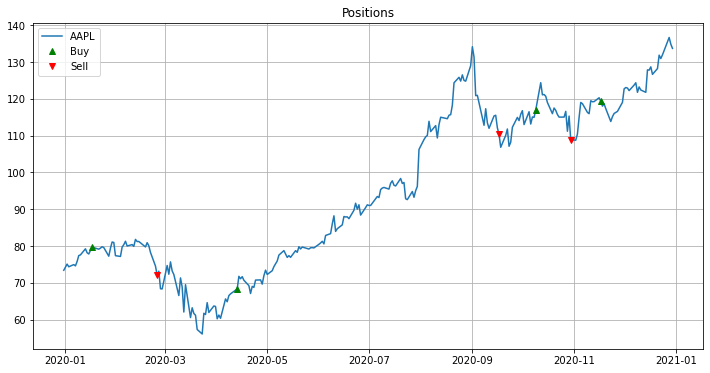

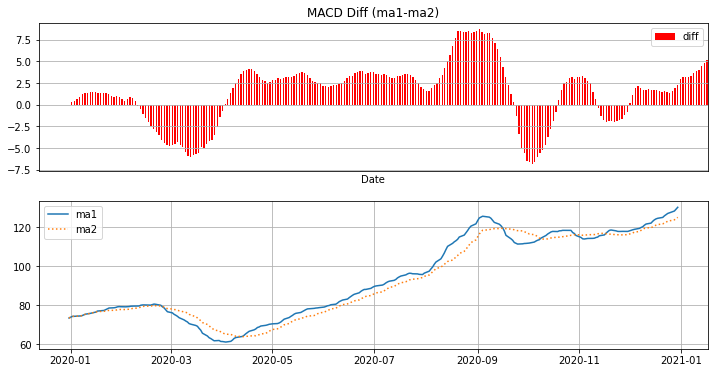

In [11]:
plot(df, 'AAPL')

In [12]:

# 信号的分布
df['signals'].value_counts()


 0.0    245
 1.0      4
-1.0      3
Name: signals, dtype: int64

In [13]:
df['positions'].value_counts()


1    180
0     73
Name: positions, dtype: int64